# Logistic Regression
## Lead-Scoring Case study

#### Problem Statement:

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 
- To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
- If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Importing important libraries & modules

In [370]:
import pandas as pd
import numpy as np
import statsmodels
import sklearn
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
np.random.seed(0)
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
pd.set_option('display.max_columns', 500)
from sklearn.metrics import precision_score, recall_score

## Reading and Understanding the Data

In [248]:
#Importing the bike-sharing dataset using pandas 
leads = pd.read_csv(r'C:\Users\anmol\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking table statistics, null values & missing data

In [249]:
leads.shape

(9240, 37)

In [250]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [251]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Preparation - Part 1

### Data Imputation
- Replacing records with 'Select' values with Null.

In [252]:
leads.replace('Select', np.nan, inplace=True)

### Checking for Null values

In [253]:
round((leads.isnull().sum()/len(leads.index))*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

### Dropping columns with High percentage of Nulls

In [254]:
leads = leads.drop(['How did you hear about X Education','Lead Profile'],axis=1)

#### Checking column 'Lead Quality'

In [255]:
leads['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Imputing Nulls with 'Not Sure'

In [256]:
leads['Lead Quality'].fillna('Not Sure',inplace=True)

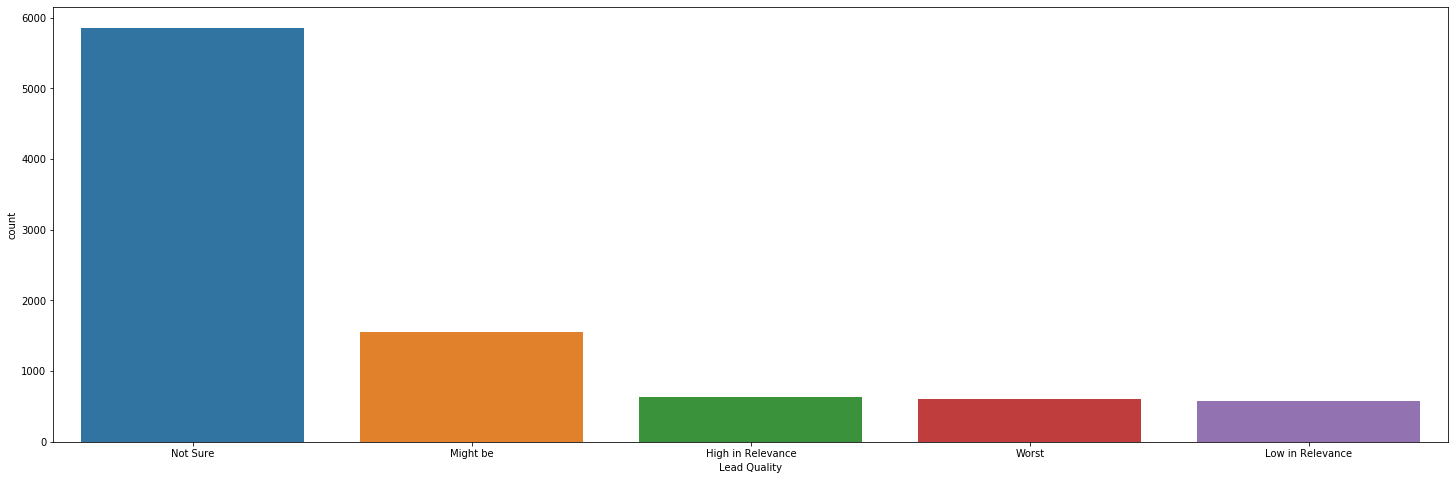

In [257]:
plt.figure(figsize=(25,8))
sns.countplot(leads['Lead Quality'],order = leads['Lead Quality'].value_counts().index)
plt.show()

#### Checking values of Lead Source

In [258]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
WeLearn                 1
welearnblog_Home        1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [259]:
#Data Imputation for Lead Source
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')

In [260]:
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home','Referral Sites',
                                                     'WeLearn','blog','Pay per Click Ads','Welingak Website',
                                                    'testone','NC_EDM','Social Media','Live Chat','Reference'] ,'Others') 

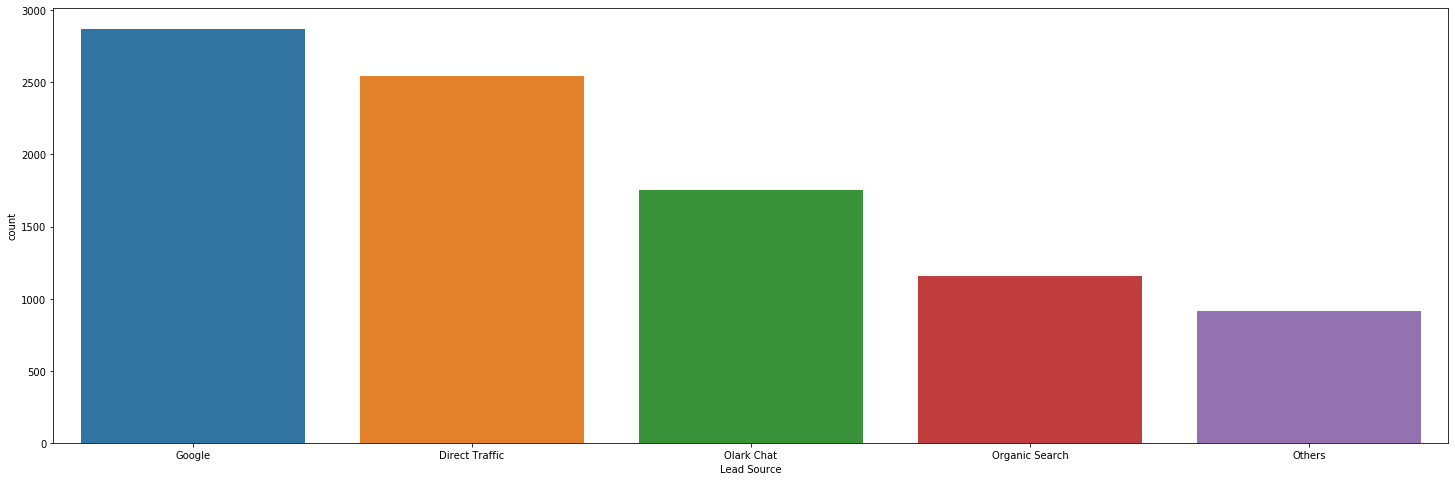

In [261]:
plt.figure(figsize=(25,8))
sns.countplot(leads['Lead Source'],order = leads['Lead Source'].value_counts().index)
plt.show()

#### Checking values of Lead Source

In [262]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [263]:
# Imputing values for Lead Origin
leads['Lead Origin'] = leads['Lead Origin'].replace(['Quick Add Form'] ,'Lead Add Form') 

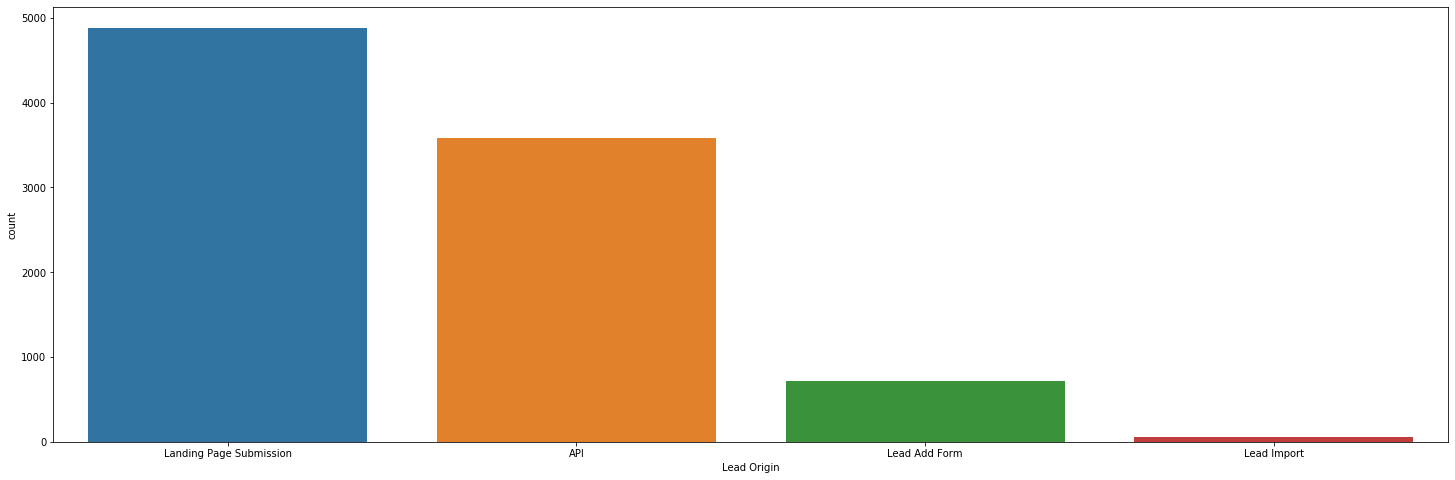

In [264]:
plt.figure(figsize=(25,8))
sns.countplot(leads['Lead Origin'],order = leads['Lead Origin'].value_counts().index)
plt.show()

#### Dropping indexes & unimportant variables

In [265]:
leads = leads.drop(['Prospect ID','Lead Number',
                    'Asymmetrique Profile Index',
                    'Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score'], axis=1)

#### Checking for City Column

In [266]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [267]:
#Replacing Null values with "Other Cities"
leads['City'] = leads['City'].replace(np.nan ,'Other Cities') 


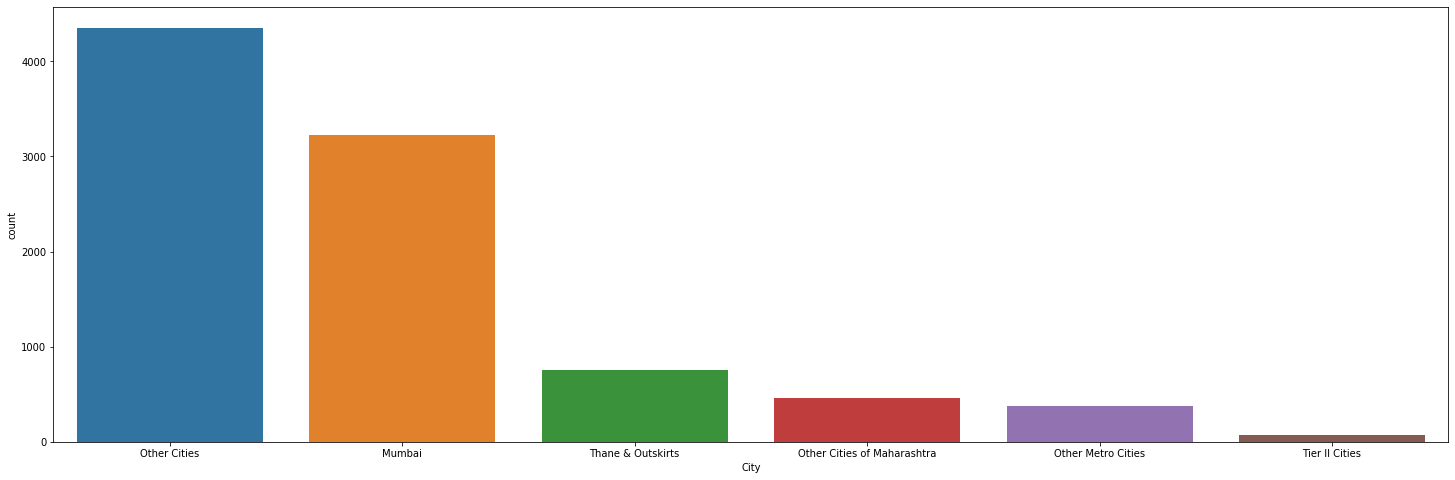

In [268]:
plt.figure(figsize=(25,8))
sns.countplot(leads['City'],order = leads['City'].value_counts().index)
plt.show()

### Checking for Specialisation

In [269]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [270]:
#Imputing Null Values with 'Others'

leads['Specialization'] = leads['Specialization'].replace(np.nan ,'Other Specialization') 

#### Checking for Tags

In [271]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [272]:
#Imputing Nulls with "No Tags"
leads['Tags'] = leads['Tags'].replace(np.nan ,'No Tags') 

#### Checking 'What is your current occupation'

In [273]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [274]:
#Imputing Null and some columns with 'Other Occupation'
leads['What is your current occupation'] = leads['What is your current occupation'].replace([np.nan,'Other','Housewife'
                                                                                             ,'Businessman'],'Other Occupation')

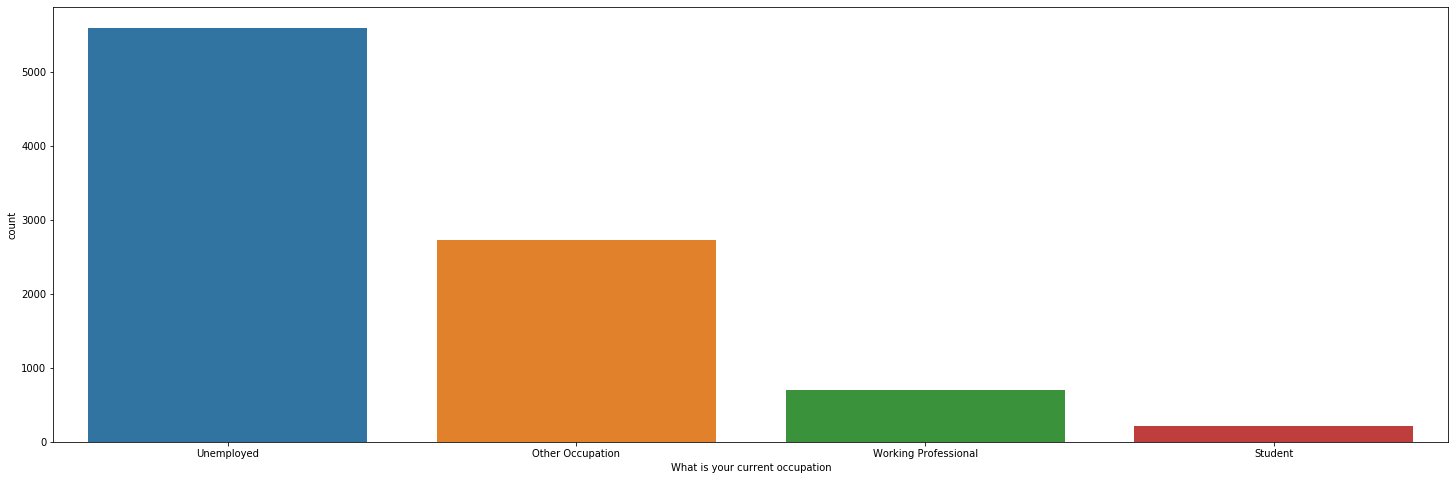

In [275]:
plt.figure(figsize=(25,8))
sns.countplot(leads['What is your current occupation'],order = leads['What is your current occupation'].value_counts().index)
plt.show()

### Checking for 'Country'

In [276]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Belgium                    2
Philippines                2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
Uganda                     2
Ghana                      2
Bangladesh                 2
China                      2
Kenya                      1
Sri Lanka                  1
Switzerland                1
Tanzania                   1
Indonesia                  1
Russia        

#### More than 99% of the valid values are from 'India'.
Dropping 'Country' Column as it would not be relevant due to data skewness.

In [277]:
leads = leads.drop(['Country'], axis=1)

#### Checking Other columns for Data Imbalance

In [278]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [279]:
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [280]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [281]:
leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [282]:
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [283]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [284]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [285]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [286]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [287]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [288]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [289]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [290]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [291]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### Dropping Similar columns due to high Data Imbalance

In [292]:
leads = leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Do Not Email','What matters most to you in choosing a course'],
                  axis=1)

### Checking Null percentages again

In [293]:
round((leads.isnull().sum()/len(leads.index))*100,2).sort_values(ascending=False)


Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
City                                      0.00
Lead Quality                              0.00
Tags                                      0.00
What is your current occupation           0.00
Specialization                            0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Lead Source                               0.00
Lead Origin                               0.00
dtype: float64

### Dropping records with null values

In [294]:
leads = leads.dropna()

### Checking Current Conversion Rate

In [295]:
print((sum(leads['Converted'])/len(leads['Converted'].index))*100)

38.02043282434362


### Checking Correlation

In [296]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


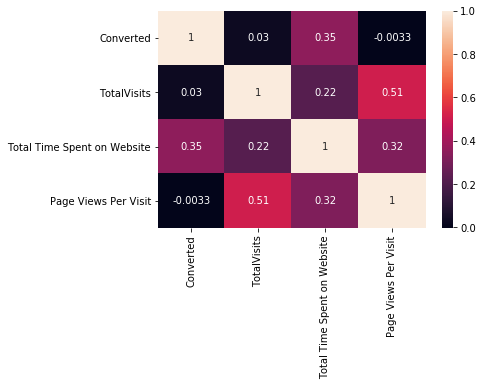

In [297]:
sns.heatmap(leads.corr(),  annot=True)
plt.show()

- Observed correlation between 'Total Visits', 'Total Time Spent on Website' & 'Page Views Per Visit'

### Pair Plots

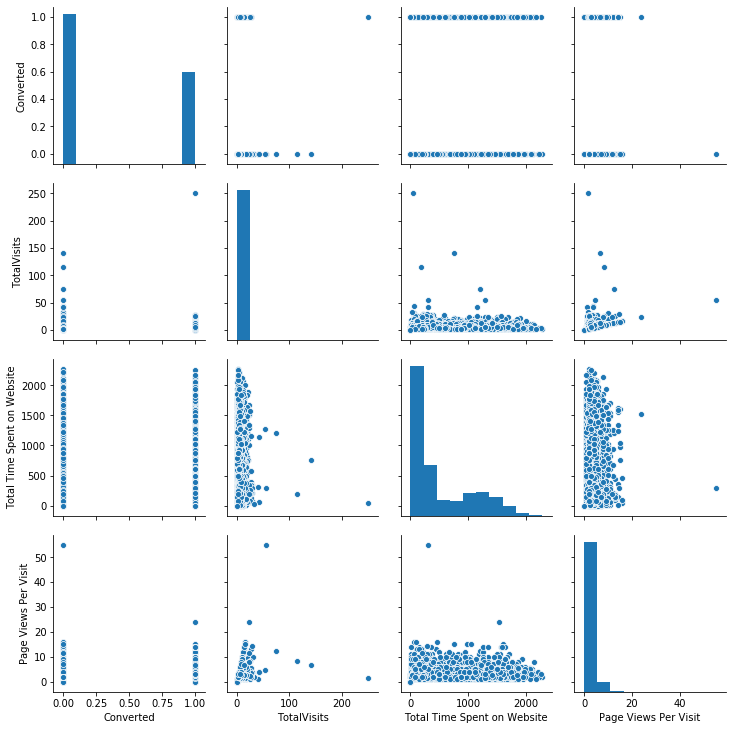

In [298]:
sns.pairplot(leads)
plt.show()

## Data Preparation - Part 2

### Creating Dummy Variables

In [299]:
dummies = pd.get_dummies(leads[['Lead Origin', 
                                'Lead Source', 
                                'Last Activity', 
                                'Specialization',
                                'What is your current occupation',
                                'Last Notable Activity','Lead Quality','Tags','City',
                               'A free copy of Mastering The Interview']], drop_first=True)

In [300]:
#Concatenating dummy variables in the leads dataset
leads = pd.concat([leads, dummies], axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tags,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Other Cities,No,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Other Cities,No,Email Opened,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,15

In [301]:
#Dropping categorical variables after creation of dummy variables
leads = leads.drop(['Lead Origin', 
                        'Lead Source', 
                        'Last Activity', 
                        'Specialization','A free copy of Mastering The Interview',
                        'What is your current occupation',
                        'Last Notable Activity','Lead Quality','Tags','City'], axis=1)

In [302]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tags,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

### Splitting the data into Training & Test set

In [303]:
# Assigning dependent variable and Independent variables.

X = leads.drop('Converted', axis=1)
y = leads['Converted']

In [304]:
y.value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features 

In [336]:
# Performing Min-Max Scaling

#Defining scaler object
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the boolean and dummy variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [337]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tags,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
7962,0.011952,0.570794,0.027273,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5520,0.027888,0.026631,0.127273,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1962,0.019920,0.075011,0.045455,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,0.055777,0.550821,0.063636,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9

## Data Modelling
We will perform this step using two methods:-
1. **Automatic RFE (recursive feature elimination)**
2. **Manual feature selection.**

### RFE (Recursive Feature Elimination)

In [338]:
# Initialising models for RFE & fitting on the train dataset
lm = LogisticRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
# Printing top 15 variables ('True') selected by RFE model
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 53),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 76),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Others', False, 24),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link Clicked', False, 44),
 ('Last Activity_Email Marked Spam', False, 81),
 ('Last Activity_Email Opened', False, 45),
 ('Last Activity_Email Received', False, 70),
 ('Last Activity_Form Submitted on Website', False, 69),
 ('Last Activity_Had a Phone Conversation', False, 38),
 ('Last Activity_Olark Chat Conversation', False, 18),
 ('Last Activity_Page Visited on Website', False, 27),
 ('Last Activity_Resubscribed to emails', False, 55),
 ('Last Activity_SMS Sent', True, 1),
 (

In [339]:
#Columns to keep
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_No Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

In [340]:
#Columns to drop
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finan

### Manual Feature Selection
#### Building model using statsmodel, for the detailed statistics

In [341]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [342]:
#Custom Function to build & rebuild the model iteratively and return summary statistics

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.GLM(y,X, family = sm.families.Binomial()).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
#Custom function to check the VIF (Variance Inflation Factor)

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Running the model on RFE variables dataset

In [343]:
X_train_new = build_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1178.2
Date:                Mon, 14 Mar 2022   Deviance:                       2356.3
Time:                        02:29:08   Pearson chi2:                 8.03e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Observations
- **'Tags_Lateral student'** has a high p-value of 0.999

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Using custom function to get VIF
checkVIF(X_train_new)

,Features,VIF
0,const,20.94
12,Tags_No Tags,4.36
5,What is your current occupation_Unemployed,3.35
14,Tags_Will revert after reading the email,2.64
6,What is your current occupation_Working Profes...,2.13
13,Tags_Ringing,1.81
7,Lead Quality_Worst,1.46
9,Tags_Closed by Horizzon,1.41
2,Lead Origin_Lead Add Form,1.33
4,What is your current occupation_Student,1.32


***Observations*** :-
   - VIF for all features are in acceptable range of <5

In [345]:
#Dropping the 'Spring' column due to high P-value
X_train_new = X_train_new.drop(['Tags_Lateral student','const'],axis=1)
#Building the model ith updated train dataset
X_train_new = build_model(X_train_new, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1183.6
Date:                Mon, 14 Mar 2022   Deviance:                       2367.2
Time:                        02:29:08   Pearson chi2:                 8.09e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [346]:
#Checking VIF again on the new model
checkVIF(X_train_new)

,Features,VIF
0,const,20.91
11,Tags_No Tags,4.35
5,What is your current occupation_Unemployed,3.35
13,Tags_Will revert after reading the email,2.63
6,What is your current occupation_Working Profes...,2.13
12,Tags_Ringing,1.80
7,Lead Quality_Worst,1.46
9,Tags_Closed by Horizzon,1.40
2,Lead Origin_Lead Add Form,1.33
4,What is your current occupation_Student,1.32


***Observations***
- The VIFs and p-values both are within an acceptable range.

## Model Evaluation - Train Set
### Making Predictions on the train set

In [347]:
X_train_new = X_train_new.drop(['const'],axis=1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.GLM(y_train,X_train_new, family = sm.families.Binomial()).fit()
y_train_pred = lm.predict(X_train_new)
y_train_pred.head()

7962    0.376931
5520    0.115672
1962    0.020169
1566    0.979301
9170    0.010126
dtype: float64

### Prediction Cut-off - 80%
CEO has given a ballpark of the **target** lead conversion rate to be around **80%.**

In [348]:
y_train_pred_label = y_train_pred.apply(lambda x: 1 if x > 0.8 else 0)

### Prediction Probabilities

In [349]:
train_pred_prob = pd.DataFrame({'Converted':y_train, 'Converted_prob': y_train_pred, 'Converted_pred':y_train_pred_label})
train_pred_prob.head(20)

,Converted,Converted_prob,Converted_pred
7962,0,0.376931,0
5520,0,0.115672,0
1962,0,0.020169,0
1566,1,0.979301,1
9170,0,0.010126,0
5097,0,0.029863,0
8954,0,0.037247,0
309,1,0.907966,1
5519,1,0.187635,0
1050,1,0.973790,1


### Confusion Matrix

In [350]:
confusion=metrics.confusion_matrix(train_pred_prob.Converted, train_pred_prob.Converted_pred )
confusion

array([[3879,   74],
       [ 490, 1929]], dtype=int64)

**Predicted&emsp;&emsp;&emsp;&emsp;Not Converted&emsp;&emsp;Converted** <br>
<br>
**Actual**<br>
<br>
**Not Converted**&emsp;&emsp;&emsp;3879&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;74<br>
<br>
**Converted**&emsp;&emsp;&emsp;&emsp;&emsp;490&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1929  <br>
<br> 

### Accuracy

In [351]:
metrics.accuracy_score(train_pred_prob.Converted, train_pred_prob.Converted_pred)

0.911487758945386

**~ 91%** Accuracy

### Sensitivity

In [352]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP / float(TP+FN))

0.7974369574204216


**~ 79%** Sensitivity

### Specificity

In [353]:
TN / float(TN+FP)

0.9812800404755881

**~ 98%** Specificity

### False Positive Rate (FPR)

In [354]:
FP/ float(TN+FP)

0.018719959524411838

**~ 2%** FPR

### Positive Predictive Value (PPV)

In [355]:
TP / float(TP+FP)

0.963055416874688

**~ 96%** PPV

### Negative Predictive Value (NPV)

In [356]:
TN / float(TN+ FN)

0.8878461890592813

**~ 89%** NPV

## ROC  Curve
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [357]:
# Function for ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [358]:
fpr, tpr, thresholds = metrics.roc_curve(train_pred_prob.Converted, train_pred_prob.Converted_prob, drop_intermediate = False )

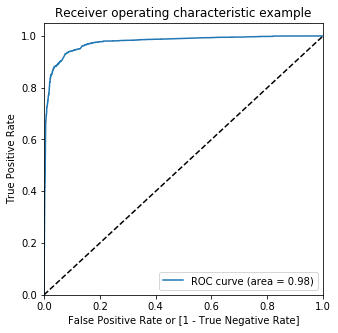

In [359]:
draw_roc(train_pred_prob.Converted, train_pred_prob.Converted_prob)

### Observations :-
**- The model seems to be performing well.** <br>
**- The ROC curve has a value of 0.98, which is very good.** <br> 
**- We have the following values for the Train Data:**<br>
    * Accuracy : 91.1%
    * Sensitivity : 79.7%
    * Specificity : 98.1%

## Model Evaluation - Test Set
### Making Predictions on the test set

In [360]:
#Scaling the Test data
# Apply scaler() to all the columns except the boolean and dummy variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [361]:
# Predicting on test dataset
X_test = X_test[col]
X_test = X_test.drop(['Tags_Lateral student'],axis=1)
X_test_new = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_new)

In [362]:
# Setting cut-off labels above 80%
y_test_pred_label = y_test_pred.apply( lambda x : 1 if x>0.8 else 0)

### Prediction - Probablities

In [363]:
test_pred_prob = pd.DataFrame({'Coverted': y_test, 'Converted_Prob':y_test_pred, 'Converted_Pred':y_test_pred_label})
test_pred_prob.head(20)

,Coverted,Converted_Prob,Converted_Pred
3504,0,0.005442,0
4050,1,0.997588,1
7201,0,0.194026,0
1196,0,0.005433,0
8219,1,0.994779,1
8747,0,0.029863,0
9048,1,0.332441,0
6524,0,0.013304,0
7693,0,0.088582,0
8187,0,0.150489,0


### Accuracy

In [366]:
metrics.accuracy_score(test_pred_prob.Coverted, test_pred_prob.Converted_Pred)

0.9091907726107653

**~ 91%** Accuracy

### Confusion Matrix

In [367]:
confusiont = metrics.confusion_matrix(test_pred_prob.Coverted, test_pred_prob.Converted_Pred)
confusiont

array([[1656,   33],
       [ 215,  827]], dtype=int64)

**Predicted&emsp;&emsp;&emsp;&emsp;Not Converted&emsp;&emsp;Converted** <br>
<br>
**Actual**<br>
<br>
**Not Converted**&emsp;&emsp;&emsp;1656&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;33<br>
<br>
**Converted**&emsp;&emsp;&emsp;&emsp;&emsp;215&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;827  <br>
<br> 

### Sensitivity

In [369]:
TP = confusiont[1,1] # true positives
TN = confusiont[0,0] # true negatives
FP = confusiont[0,1] # false positives
FN = confusiont[1,0] # false negatives
print(TP / float(TP+FN))

0.7936660268714012


**~ 79%** Sensitivity

### Specificity

In [371]:
TN / float(TN+FP)

0.9804618117229129

**~ 98%** Specificity

### Precision

In [372]:
precision_score(test_pred_prob.Coverted, test_pred_prob.Converted_Pred)

0.9616279069767442

**~ 96%** Precision

### Recall

In [373]:
recall_score(test_pred_prob.Coverted, test_pred_prob.Converted_Pred)

0.7936660268714012

**~ 79%** Recall

## ROC Curve

In [374]:
fpr, tpr, thresholds = metrics.roc_curve(test_pred_prob.Coverted, test_pred_prob.Converted_Prob, drop_intermediate = False )

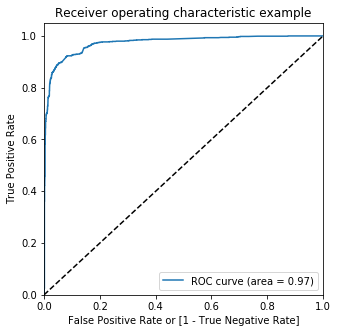

In [375]:
draw_roc(test_pred_prob.Coverted, test_pred_prob.Converted_Prob)

## Final Observation:

Below are the model evaluation metrics obtained for Train & Test Data:

### <u> Train Data: </u>
- Accuracy : **91.1%**
- Sensitivity : **79.7%**
- Specificity : **98.1%**

### <u> Test Data: </u>
- Accuracy :  **90.9%**
- Sensitivity : **79.3%**
- Specificity : **98.04%**

**This Logistic Regression Model seems to predict the Conversion Rate for Leads well and we would be able to leverage this model in confidence in selecting the most promising leads for making calls**